In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

import plotly.express as px
import matplotlib.patches as patches

# work with images
from skimage.transform import rotate
from skimage import io
import cv2 as cv
from sklearn.utils import shuffle

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
from glob import glob 
# Python ≥3.5 is required

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

import plotly.express as px
import matplotlib.patches as patches

# work with images
from skimage.transform import rotate
from skimage import io
import cv2 as cv
from sklearn.utils import shuffle

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

In [ ]:
# NECESSARY IN KAGGLE NOTEBOOK ONLY
#get files
# test_path = '../input/histopathologic-cancer-detection/test/'
# train_path = '../input/histopathologic-cancer-detection/train/'
# sample_submission = pd.read_csv('../input/histopathologic-cancer-detection/sample_submission.csv')
# train_data = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

df = pd.read_csv('train_labels.csv')
print("dimensions:",df.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(df.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(df.shape[1]))

dimensions: (220025, 2)
rows = 220025
columns = 2


In [ ]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [ ]:
from glob import glob 

base_tile_dir = 'train'
data = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.tif'))}) # to add lines with.tif to the paths of the images
# print(data.head())
data['id'] = data.path.map(lambda x: os.path.basename(x).split('.')[0]) # to get the image id from the image's name when split by the / in the path
data = data.merge(df, on = "id")

In [ ]:
data.head

<bound method NDFrame.head of                                                    path  \
0     train\0000d563d5cfafc4e68acb7c9829258a298d9b6a...   
1     train\0000da768d06b879e5754c43e2298ce48726f722...   
2     train\0000f8a4da4c286eee5cf1b0d2ab82f979989f7b...   
3     train\000a2a35668f04edebc0b06d5d133ad90c93a044...   
4     train\000aa5d8f68dc1f45ebba53b8f159aae80e06072...   
...                                                 ...   
4995  train\0f9efcb43cf988f7b3353e0da9469362d18f0201...   
4996  train\0f9f21b84999b2c4573b253b1b45449facb79d0e...   
4997  train\0f9f36b2a572c224258af7655db9d513d7519bf4...   
4998  train\0f9fb92dcadd853d2e56be05ffa2861ab3a86f7e...   
4999  train\0f9fc09886f93460dace9104bf948248173af5ec...   

                                            id  label  
0     0000d563d5cfafc4e68acb7c9829258a298d9b6a      0  
1     0000da768d06b879e5754c43e2298ce48726f722      1  
2     0000f8a4da4c286eee5cf1b0d2ab82f979989f7b      0  
3     000a2a35668f04edebc0b06d5d133ad

In [ ]:
data.shape

(5000, 3)

In [ ]:
data.info() # to understand the columns and their types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5000 non-null   object
 1   id      5000 non-null   object
 2   label   5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 156.2+ KB


In [ ]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [ ]:
data.duplicated().describe() # one unique value of false means no duplicate value

count      5000
unique        1
top       False
freq       5000
dtype: object

In [ ]:
# non-malignant cases- 0
# malignant cases- 1
vc = data['label'].value_counts()
vc

0    2985
1    2015
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

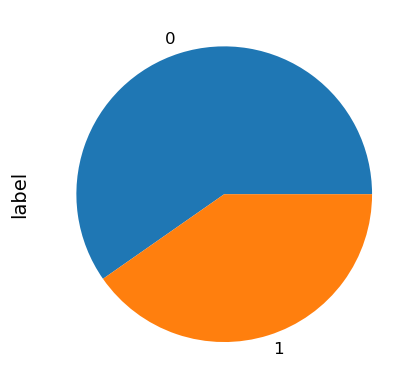

In [ ]:
data['label'].value_counts().plot(kind="pie")

In [ ]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [ ]:
m = data.loc[data['label']==1] # malignant
nm = data.loc[data['label']==0] # non-malignant #['id'].values

In [ ]:
# to sample as many random images as possible (so 89117 is the least of the two values) and ensure the tranining set has equal number of of 0 and 1 cases
custom_image_data = pd.concat([m.sample(vc[1],random_state=42), nm.sample(vc[1],random_state=42)], axis=0, ignore_index=True).reset_index()
custom_image_data['label'].value_counts() # to verify the process 

1    2015
0    2015
Name: label, dtype: int64

In [ ]:
custom_image_data.columns

Index(['index', 'path', 'id', 'label'], dtype='object')

 #### 0 - No cancer cells, 1 - Cancer cells

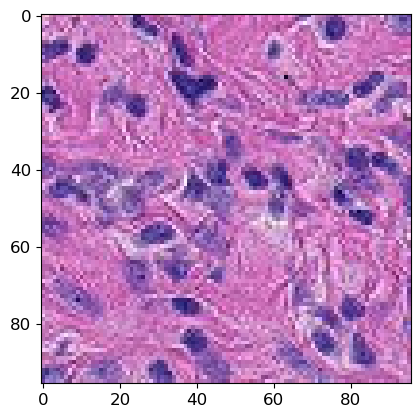

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread(f'train/{custom_image_data.iloc[0][2]}.tif')
imgplot = plt.imshow(img)

In [ ]:
# data0 = data[df.label == 0]
# data1 = data[df.label == 1]
# data = pd.concat([data0, data1], ignore_index=True).reset_index()
# data = data[["path", "id", "label"]]
# data.sample(10)

In [ ]:
from skimage.io import imread #read images from files
custom_image_data['image'] = custom_image_data['path'].map(imread)
custom_image_data.head()

,index,path,id,label,image
0,0,train\0d0d806f2899e4be15eca3a0b4459534887a0252...,0d0d806f2899e4be15eca3a0b4459534887a0252,1,"[[[236, 182, 205], [255, 200, 231], [208, 139,..."
1,1,train\0b266b0794520b9cc0a4895c36ac88994e649168...,0b266b0794520b9cc0a4895c36ac88994e649168,1,"[[[124, 80, 141], [131, 87, 146], [143, 100, 1..."
2,2,train\0ac16cbe61771f5092293467c9755d30d5696e59...,0ac16cbe61771f5092293467c9755d30d5696e59,1,"[[[109, 60, 89], [229, 178, 211], [255, 212, 2..."
3,3,train\0dae394163423c95d14b00874634ccd9459130b7...,0dae394163423c95d14b00874634ccd9459130b7,1,"[[[110, 45, 137], [133, 76, 153], [224, 184, 2..."
4,4,train\0ad66f607ce3d3a186fea3d1ca420730b3afe542...,0ad66f607ce3d3a186fea3d1ca420730b3afe542,1,"[[[212, 129, 207], [204, 125, 206], [176, 103,..."


In [ ]:
input_images = np.stack(list(custom_image_data.image), axis = 0)
input_images.shape

(4030, 96, 96, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils


train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(custom_image_data.label)
x = input_images

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

val_size = int(0.5*len(test_tensors))


val_tensors = test_tensors[:val_size]
val_targets = test_targets[:val_size]
test_tensors = test_tensors[val_size:]
test_targets = test_targets[val_size:]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
tf.__version__

'2.11.0'

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = (96, 96, 3)))

# model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# model.compile(loss="binary_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])

In [ ]:
# epochs = 15
# model.fit(train_tensors, train_targets, 
#           validation_data=(val_tensors, val_targets),
#           epochs=epochs, verbose=1)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.layers import Dense
 
from sklearn.model_selection import KFold
import numpy as np

num_folds = 10

# Merge inputs and targets
inputs = np.concatenate((train_tensors, test_tensors), axis=0)
targets = np.concatenate((train_targets, test_targets), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
for train, test in kfold.split(inputs, targets):    

    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='sigmoid'))
    model.add(layers.Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

In [ ]:

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 10
model.fit(inputs[train], targets[train],
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/10
41/41 [==============================] - 33s 762ms/step - loss: 11.4107 - accuracy: 0.5087
Epoch 2/10
41/41 [==============================] - 28s 686ms/step - loss: 1.5060 - accuracy: 0.5905
Epoch 3/10
41/41 [==============================] - 27s 669ms/step - loss: 0.6030 - accuracy: 0.7072
Epoch 4/10
41/41 [==============================] - 29s 704ms/step - loss: 0.4706 - accuracy: 0.7825
Epoch 5/10
41/41 [==============================] - 29s 705ms/step - loss: 0.3427 - accuracy: 0.8606
Epoch 6/10
41/41 [==============================] - 28s 687ms/step - loss: 0.3080 - accuracy: 0.8732
Epoch 7/10
41/41 [==============================] - 28s 691ms/step - loss: 0.2227 - accuracy: 0.9185
Epoch 8/10
41/41 [==============================] - 30s 739ms/step - loss: 0.1766 - accuracy: 0.9332
Epoch 9/10
41/41 [==============================] - 30s 732ms/step - loss: 0.1683 - accuracy: 0.9397
Epoch 10/10
41/41 [==============================] - 29s 703ms/step - loss: 0.1362 - accur

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score


cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

def evaluate(cancer_predictions):

    test_accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==test_targets.flatten())/len(cancer_predictions)
    print('Test accuracy: %.4f%%' % test_accuracy)


#     score = roc_auc_score(np.round(cancer_predictions).astype('int32'), test_targets)
    score = roc_auc_score(test_targets, cancer_predictions)

    print('ROC AUC Score: %.4f%%' % score)

    precision = precision_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('Precision score: %.4f%%' % precision)

    recall = recall_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('Recall Score: %.4f%%' % recall)

    f1 = f1_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('F1 Score: %.4f%%' % f1)

    cm = confusion_matrix(np.round(cancer_predictions).astype('int32'), test_targets)
    print("Confusion Matrix: \n %s" % cm)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print('Sensitivity Score of the classifier is: ', sensitivity)

    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    print('Specificity Score of the classifier is: ', specificity)

evaluate(cancer_predictions)
    

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 19ms/step
Test accuracy: 94.5409%
ROC AUC Score: 0.9804%
Precision score: 0.9327%
Recall Score: 0.9604%
F1 Score: 0.9463%
Confusion Matrix: 
 [[187  14]
 [  8 194]]
True positive =  187
False positive =  14
False negative =  8
True negative =  194
Sensitivity Score of the classifier is:  0.9303482587064676
Specificity Score of the classifier is:  0.9603960396039604


#### Experimentation with hyperparameters

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(layers.Dropout(0.5))


model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-2), loss='binary_crossentropy', metrics=['accuracy']) #0.01
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=50, verbose=1)

Epoch 1/5
65/65 [==============================] - 24s 346ms/step - loss: 1.4394 - accuracy: 0.5028 - val_loss: 1.1408 - val_accuracy: 0.4615
Epoch 2/5
65/65 [==============================] - 21s 323ms/step - loss: 0.7434 - accuracy: 0.4972 - val_loss: 0.7078 - val_accuracy: 0.5385
Epoch 3/5
65/65 [==============================] - 21s 326ms/step - loss: 0.7357 - accuracy: 0.4919 - val_loss: 0.7168 - val_accuracy: 0.4615
Epoch 4/5
65/65 [==============================] - 21s 326ms/step - loss: 0.7162 - accuracy: 0.5012 - val_loss: 0.6901 - val_accuracy: 0.5385
Epoch 5/5
65/65 [==============================] - 21s 321ms/step - loss: 0.7119 - accuracy: 0.4978 - val_loss: 0.6921 - val_accuracy: 0.5385


In [ ]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

evaluate(cancer_predictions)

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 24ms/step
Test accuracy: 51.6129%
ROC AUC Score: 0.5350%
Precision score: 1.0000%
Recall Score: 0.5161%
F1 Score: 0.6809%
Confusion Matrix: 
 [[  0   0]
 [195 208]]
True positive =  0
False positive =  0
False negative =  195
True negative =  208
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  0.5161290322580645


C:\Users\HP\AppData\Local\Temp\ipykernel_4332\3226100531.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


In [ ]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-4), loss='binary_crossentropy', metrics=['accuracy']) 
epochs = 10
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=10, verbose=1)

Epoch 1/10
323/323 [==============================] - 27s 80ms/step - loss: 0.6978 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4640
Epoch 2/10
323/323 [==============================] - 24s 74ms/step - loss: 0.6975 - accuracy: 0.5059 - val_loss: 0.6964 - val_accuracy: 0.4615
Epoch 3/10
323/323 [==============================] - 23s 72ms/step - loss: 0.7006 - accuracy: 0.4935 - val_loss: 0.6952 - val_accuracy: 0.4615
Epoch 4/10
323/323 [==============================] - 23s 73ms/step - loss: 0.6980 - accuracy: 0.5025 - val_loss: 0.6977 - val_accuracy: 0.4615
Epoch 5/10
323/323 [==============================] - 23s 71ms/step - loss: 0.6984 - accuracy: 0.5012 - val_loss: 0.6934 - val_accuracy: 0.4640
Epoch 6/10
323/323 [==============================] - 25s 77ms/step - loss: 0.6992 - accuracy: 0.5031 - val_loss: 0.6938 - val_accuracy: 0.4615
Epoch 7/10
323/323 [==============================] - 26s 80ms/step - loss: 0.6986 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy:

In [ ]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

evaluate(cancer_predictions)

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 30ms/step
Test accuracy: 51.6129%
ROC AUC Score: 0.5380%
Precision score: 1.0000%
Recall Score: 0.5161%
F1 Score: 0.6809%
Confusion Matrix: 
 [[  0   0]
 [195 208]]
True positive =  0
False positive =  0
False negative =  195
True negative =  208
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  0.5161290322580645


C:\Users\HP\AppData\Local\Temp\ipykernel_4332\3226100531.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


In [ ]:
#reduced layers 
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/5
41/41 [==============================] - 18s 426ms/step - loss: 995.7758 - accuracy: 0.5295 - val_loss: 327.9832 - val_accuracy: 0.4864
Epoch 2/5
41/41 [==============================] - 21s 506ms/step - loss: 210.9345 - accuracy: 0.5729 - val_loss: 327.4164 - val_accuracy: 0.4789
Epoch 3/5
41/41 [==============================] - 17s 419ms/step - loss: 88.4263 - accuracy: 0.6818 - val_loss: 48.9939 - val_accuracy: 0.7022
Epoch 4/5
41/41 [==============================] - 22s 532ms/step - loss: 107.4716 - accuracy: 0.6507 - val_loss: 394.4544 - val_accuracy: 0.4615
Epoch 5/5
41/41 [==============================] - 20s 491ms/step - loss: 165.4972 - accuracy: 0.6238 - val_loss: 98.1844 - val_accuracy: 0.7097


In [ ]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

evaluate(cancer_predictions)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 62ms/step
Test accuracy: 68.7345%
ROC AUC Score: 0.7053%
Precision score: 0.5577%
Recall Score: 0.7733%
F1 Score: 0.6480%
Confusion Matrix: 
 [[161  92]
 [ 34 116]]
True positive =  161
False positive =  92
False negative =  34
True negative =  116
Sensitivity Score of the classifier is:  0.6363636363636364
Specificity Score of the classifier is:  0.7733333333333333


### MultiLayer Perceptron - Train-Test Split


80-20 Split

In [ ]:
# our best architecture: 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

def bestarch():
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.add(layers.Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-2), loss='binary_crossentropy', metrics=['accuracy']) #0.01

    return model


def getAcc(cancer_predictions, targets):
    accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==targets.flatten())/len(cancer_predictions)
    return accuracy




In [ ]:


# 80-20 split
train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(custom_image_data.label)
x = input_images

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class1 =  bestarch().fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions, train_targets)


cancer_predictions =  [class1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

50 - 50 Train - Test Split

In [ ]:

# 50-50 split
train_fraction = 0.5


train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class2 =  bestarch().fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class2.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions, train_targets)


cancer_predictions =  [class2.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

20 - 80 Train- Test Split

In [ ]:
# 20-80 split
train_fraction = 0.2

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class3 =  bestarch().fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class3.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions,train_targets)


cancer_predictions =  [class3.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

NameError: name 'LabelBinarizer' is not defined

In [ ]:
np.random.seed(42)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                               verbose=1, save_best_only=True)

def backbone():
    model = Sequential()
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3)) 

    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3)) 

    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3))

    model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
    model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
    model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'elu'))

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid')) 

    return model

model = backbone()

In [ ]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/5
41/41 [==============================] - 58s 1s/step - loss: 0.8455 - accuracy: 0.5720 - val_loss: 0.6738 - val_accuracy: 0.5906
Epoch 2/5
41/41 [==============================] - 54s 1s/step - loss: 0.5963 - accuracy: 0.7032 - val_loss: 0.4895 - val_accuracy: 0.7816
Epoch 3/5
41/41 [==============================] - 55s 1s/step - loss: 0.5239 - accuracy: 0.7553 - val_loss: 0.5338 - val_accuracy: 0.7618
Epoch 4/5
41/41 [==============================] - 59s 1s/step - loss: 0.4727 - accuracy: 0.7798 - val_loss: 0.5464 - val_accuracy: 0.7295
Epoch 5/5
41/41 [==============================] - 55s 1s/step - loss: 0.4540 - accuracy: 0.7937 - val_loss: 0.5074 - val_accuracy: 0.7519


In [ ]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

evaluate(cancer_predictions)

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 42ms/step
Test accuracy: 72.4566%
ROC AUC Score: 0.8481%
Precision score: 0.9038%
Recall Score: 0.6738%
F1 Score: 0.7721%
Confusion Matrix: 
 [[104  20]
 [ 91 188]]
True positive =  104
False positive =  20
False negative =  91
True negative =  188
Sensitivity Score of the classifier is:  0.8387096774193549
Specificity Score of the classifier is:  0.6738351254480287


Convolutional Neural Network Hyperparameters and Architecture Testing

In [ ]:
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation)

def backbone2():
    #Architecture 2
    model2 = Sequential()

    # conv block 1
    model2.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (96, 96, 3)))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    # conv block 2
    model2.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    # conv block 3
    model2.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    #a fully connected (also called dense) layer at the end
    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))

    #finally convert to values of 0 to 1 using the sigmoid activation function
    model2.add(Dense(1, activation = "sigmoid"))

    return model2

In [ ]:
def backbone3():
        # Architecture 3

        model3 = Sequential()

        # conv block 1
        model3.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (96, 96, 3)))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 2
        model3.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 3
        model3.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 4
        model3.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 5
        model3.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        model3.add(Dropout(0.5))

        return model3



In [ ]:
# Backbone 2: 

arch1 = backbone2()
arch1.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
arch1.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=15, batch_size=80, verbose=1, callbacks = [early_stopping])

arch2 = backbone2()
arch2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch2.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1, callbacks = [early_stopping])


# Backbone 3:
arch3 =  backbone3()
arch3.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch3.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1, callbacks = [early_stopping(min_delta = 0.001)])

arch4 =  backbone3()
arch4.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch4.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1, callbacks = [early_stopping(min_delta = 0.0001)])

# Backbone 1
arch5 = backbone()
arch5.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch5.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1, callbacks = [early_stopping(min_delta = 0.001)])

arch6 = model


Epoch 1/15
41/41 [==============================] - 103s 2s/step - loss: 0.6946 - accuracy: 0.7004 - val_loss: 0.7527 - val_accuracy: 0.4690
Epoch 2/15
41/41 [==============================] - 122s 3s/step - loss: 0.6114 - accuracy: 0.7407 - val_loss: 0.6241 - val_accuracy: 0.6253
Epoch 3/15
41/41 [==============================] - 111s 3s/step - loss: 0.5913 - accuracy: 0.7435 - val_loss: 0.5903 - val_accuracy: 0.6774
Epoch 4/15
41/41 [==============================] - 112s 3s/step - loss: 0.5662 - accuracy: 0.7540 - val_loss: 0.5816 - val_accuracy: 0.7047
Epoch 5/15
41/41 [==============================] - 115s 3s/step - loss: 0.5120 - accuracy: 0.7767 - val_loss: 0.6603 - val_accuracy: 0.6923
Epoch 6/15
41/41 [==============================] - 118s 3s/step - loss: 0.5060 - accuracy: 0.7819 - val_loss: 0.7603 - val_accuracy: 0.6873
Epoch 7/15
41/41 [==============================] - 123s 3s/step - loss: 0.4892 - accuracy: 0.7897 - val_loss: 0.8052 - val_accuracy: 0.7097
Epoch 8/15
41

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
# Get architecture predictions and evaluate accuracy 

print("ARCH 1 PERFORMANCE")
pred1 =  [arch1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred1)


print("ARCH 2 PERFORMANCE")
pred2 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred2)


print("ARCH 3 PERFORMANCE")
pred3 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred3)


print("ARCH 4 PERFORMANCE")
pred4 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred4)


print("ARCH 5 PERFORMANCE")
pred5 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred5)


print("ARCH 6 PERFORMANCE")
pred6 = cancer_predictions
evaluate(pred6)

In [ ]:
# NOTES
# model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
# epochs = 15
# model.fit(train_tensors, train_targets, 
#           validation_data=(val_tensors, val_targets),
#           epochs=epochs, batch_size=80, verbose=1, callbacks = [early_stopping, checkpointer])

# # parameters set 2: 

# batch_size = 50

# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.Adam(0.001), 
#               metrics=['accuracy'])

# # parameters set 3
# #compile
# BATCHSIZE= SMN
# 10 EPOCHS
#     adam_optimizer = Adam(learning_rate=0.0001)
#     model_two.compile(loss='binary_crossentropy', metrics=['accuracy', ROC_2], optimizer=adam_optimizer)

# #FIT


                # self.fc=nn.Sequential(
                #         nn.Linear(512*3*3,1024),
                #         nn.ReLU(inplace=True),
                #         nn.Dropout(0.4),
                #         nn.Linear(1024,512),
                #         nn.Dropout(0.4),
                #         nn.Linear(512, 1),
                #         nn.Sigmoid())

